# Tigramite for causal discovery

From: tigramite_tutorial_assumptions.ipynb

In [1]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb

from tigramite.models import LinearMediation, Prediction

import pandas as pd

/home/cide/anaconda3/envs/tigramite/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


## Load datasets

In [3]:
path = "/media/cide/datasets/CAMS/EEA_observations/pm25/"
file_pm25 = "cams-europe-pm25_nearest-pixel-observations_2020-2025.csv"
file_v10 = "cams-global-v10_nearest-pixel-observations_2020-2025.csv"
file_u10 = "cams-global-u10_nearest-pixel-observations_2020-2025.csv"
file_blh = "cams-global-blh_nearest-pixel-observations_2020-2025.csv"
file_t2m = "cams-global-t2m_nearest-pixel-observations_2020-2025.csv"
file_d2m = "cams-global-d2m_nearest-pixel-observations_2020-2025.csv"
file_pop = "cams-global-pop_nearest-pixel-observations_2020-2025.csv"
file_oro = "cams-global-elevation_nearest-pixel-observations_2020-2025.csv"

df_pm25 = pd.read_csv(path + file_pm25, index_col=0)
df_v10 = pd.read_csv(path + file_v10, index_col=0)
df_u10 = pd.read_csv(path + file_u10, index_col=0)
df_blh = pd.read_csv(path + file_blh, index_col=0)
df_t2m = pd.read_csv(path + file_t2m, index_col=0)
df_d2m = pd.read_csv(path + file_d2m, index_col=0)
df_pop = pd.read_csv(path + file_pop, index_col=0)
df_oro = pd.read_csv(path + file_oro, index_col=0)

We select a single station

In [4]:
stations = df_pm25.columns
print(len(stations))

2959


In [15]:
station_idx = stations[1000]
df_station = pd.DataFrame({"pm25":df_pm25[station_idx], "v10": df_v10[station_idx], "u10": df_u10[station_idx], "blh": df_blh[station_idx], "t2m": df_t2m[station_idx], "d2m": df_d2m[station_idx], "population": df_pop[station_idx], "oro": df_oro[station_idx]}).dropna()

(<Figure size 640x480 with 8 Axes>,
 array([<Axes: ylabel='pm25'>, <Axes: ylabel='v10'>, <Axes: ylabel='u10'>,
        <Axes: ylabel='blh'>, <Axes: ylabel='t2m'>, <Axes: ylabel='d2m'>,
        <Axes: ylabel='population'>, <Axes: ylabel='oro'>], dtype=object))

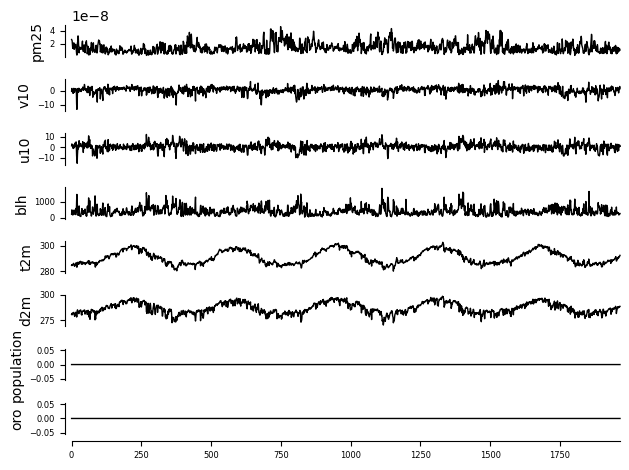

In [16]:
dataframe = pp.DataFrame(df_station.values, var_names=df_station.columns)
var_names = df_station.columns
tp.plot_timeseries(dataframe)

In [17]:
parcorr = ParCorr()
pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
all_parents = pcmci_parcorr.run_pc_stable(tau_max=2, pc_alpha=0.2)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable pm25 has 5 link(s):
        (pm25 -1): max_pval = 0.00000, |min_val| =  0.612
        (v10 -2): max_pval = 0.00001, |min_val| =  0.100
        (blh -1): max_pval = 0.00019, |min_val| =  0.084
        (blh -2): max_pval = 0.02472, |min_val| =  0.051
        (v10 -1): max_pval = 0.05617, |min_val| =  0.043

    Variable v10 has 3 link(s):
        (v10 -1): max_pval = 0.00000, |min_val| =  0.509
        (blh -1): max_pval = 0.00002, |min_val| =  0.097
        (t2m -2): max_pval = 0.13984, |min_val| =  0.033

    Variable u10 has 3 link(s):
        (u10 -1): max_pval = 0.00000, |min_val| =  0.534
        (t2m -2): max_pval = 0.02447, |min_val| =  0.051
        (v10 -2): max_pval = 0.13652, |min_val| =  0.034

    Variable blh has 3 link(s):
       

In [18]:
results = pcmci_parcorr.run_pcmci(tau_max=2, pc_alpha=0.2, alpha_level = 0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable pm25 has 5 link(s):
        (pm25 -1): max_pval = 0.00000, |min_val| =  0.612
        (v10 -2): max_pval = 0.00001, |min_val| =  0.100
        (blh -1): max_pval = 0.00019, |min_val| =  0.084
        (blh -2): max_pval = 0.02472, |min_val| =  0.051
        (v10 -1): max_pval = 0.05617, |min_val| =  0.043

    Variable v10 has 3 link(s):
        (v10 -1): max_pval = 0.00000, |min_val| =  0.509
        (blh -1): max_pval = 0.00002, |min_val| =  0.097
        (t2m -2): max_pval = 0.13984, |min_val| =  0.033

    Variable u10 has 3 link(s):
        (u10 -1): max_pval = 0.00000, |min_val| =  0.534
        (t2m -2): max_pval = 0.02447, |min_val| =  0.051
        (v10 -2): max_pval = 0.13652, |min_val| =  0.034

    Variable blh has 3 link(s):
       

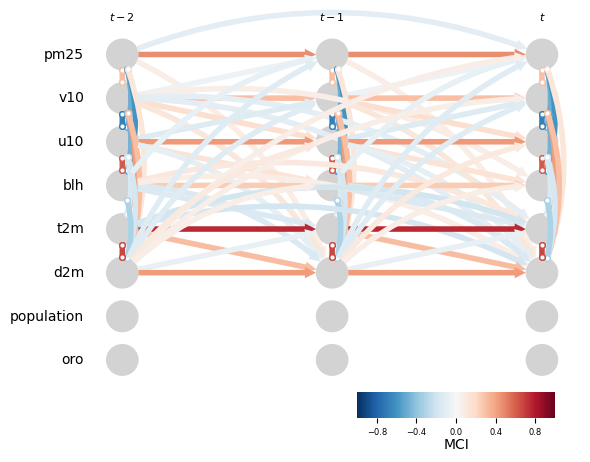

In [13]:
# Plot time series graph
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

# Graph at a given day

In [18]:
df_pm25

,SPO-AD0942A-6001,SPO-AL0203A_06001_100,SPO-AL0204A_06001_100,SPO-AL0205A_06001_100,SPO-AL0206A_06001_100,SPO-AL0208A_06001_100,SPO-AL0201A_06001_100,SPO-AL0202A_06001_100,SPO.01.0001.65188.6001.1,SPO.01.0001.65507.6001.1,...,SPO-XK0003A_06001_100,SPO-XK0004A_06001_100,SPO-XK0005A_06001_100,SPO-XK0006A_06001_100,SPO-XK0007A_06001_100,SPO-XK0008A_06001_100,SPO-XK0009A_06001_100,SPO-XK0010A_06001_100,SPO-XK0011A_06001_100,SPO-XK0012A_06001_100
2020-01-01,1.717333e-09,7.233643e-09,5.521142e-09,7.685938e-09,4.728069e-09,8.810789e-09,7.850156e-09,7.850156e-09,1.064444e-08,1.064444e-08,...,1.136182e-08,1.050577e-08,1.102372e-08,1.120837e-08,8.598652e-09,1.085861e-08,1.375961e-08,1.455134e-08,1.455134e-08,1.455134e-08
2020-01-02,2.471481e-09,8.309292e-09,5.985443e-09,9.433873e-09,3.446824e-09,8.511140e-09,8.645537e-09,8.645537e-09,1.506390e-08,1.506390e-08,...,1.498907e-08,1.057670e-08,1.188124e-08,1.410861e-08,8.569798e-09,1.313161e-08,1.447712e-08,2.024047e-08,2.024047e-08,2.024047e-08
2020-01-03,3.793623e-09,8.228335e-09,5.614282e-09,1.130721e-08,3.007978e-09,9.510055e-09,1.206348e-08,1.206348e-08,1.633003e-08,1.633003e-08,...,1.651732e-08,1.034946e-08,1.374355e-08,1.196140e-08,6.132645e-09,1.411388e-08,1.415462e-08,2.489004e-08,2.489004e-08,2.489004e-08
2020-01-04,1.648974e-09,7.253634e-09,7.802313e-09,1.338732e-08,3.898474e-09,1.226884e-08,1.164712e-08,1.164712e-08,3.589319e-09,3.589319e-09,...,1.432344e-08,8.817707e-09,1.547935e-08,1.338440e-08,6.755520e-09,1.373100e-08,1.652529e-08,2.108397e-08,2.108397e-08,2.108397e-08
2020-01-05,1.082775e-09,5.167728e-09,6.954201e-09,6.329964e-09,2.286975e-09,8.837132e-09,6.409476e-09,6.409476e-09,4.230396e-09,4.230396e-09,...,5.163844e-09,4.013930e-09,6.072104e-09,7.169615e-09,4.644448e-09,6.897485e-09,6.544870e-09,8.582653e-09,8.582653e-09,8.582653e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28,2.513690e-09,7.062161e-09,7.140756e-09,8.512935e-09,4.643573e-09,8.539534e-09,9.380588e-09,9.380588e-09,4.383784e-09,4.383784e-09,...,7.010487e-09,7.152565e-09,7.335236e-09,7.640502e-09,5.970878e-09,7.656929e-09,7.928423e-09,8.568345e-09,8.568345e-09,8.568345e-09
2025-05-29,1.992075e-09,6.365778e-09,5.664097e-09,5.976895e-09,4.268565e-09,6.361056e-09,7.928421e-09,7.928421e-09,2.756557e-09,2.756557e-09,...,6.606009e-09,5.518992e-09,7.150458e-09,7.387326e-09,6.048370e-09,7.587774e-09,7.876747e-09,9.603135e-09,9.603135e-09,9.603135e-09
2025-05-30,2.840286e-09,3.290025e-09,5.178674e-09,3.664395e-09,2.962356e-09,6.727628e-09,4.893848e-09,4.893848e-09,5.442940e-09,5.442940e-09,...,4.598765e-09,4.636741e-09,4.731959e-09,5.453697e-09,4.186905e-09,4.198663e-09,4.255297e-09,5.157451e-09,5.157451e-09,5.157451e-09
2025-05-31,4.857446e-09,6.113999e-09,4.864314e-09,5.488262e-09,4.280573e-09,5.522847e-09,6.603806e-09,6.603806e-09,6.411903e-09,6.411903e-09,...,6.498826e-09,6.339008e-09,6.189275e-09,8.033040e-09,5.831274e-09,7.099305e-09,6.746134e-09,8.195342e-09,8.195342e-09,8.195342e-09


In [20]:
day = 1000
df_day = pd.DataFrame({"pm25":df_pm25.iloc[day], "v10": df_v10.iloc[day], "u10": df_u10.iloc[day], "blh": df_blh.iloc[day], "t2m": df_t2m.iloc[day], "d2m": df_d2m.iloc[day], "population": df_pop.iloc[day], "oro": df_oro.iloc[day]}, index=df_pm25.columns)#.dropna()
df_day

,pm25,v10,u10,blh,t2m,d2m,population,oro
SPO-AD0942A-6001,1.370526e-09,-1.606041,0.295634,520.375671,282.804504,276.604614,2.080720,1705.204244
SPO-AL0203A_06001_100,2.941900e-09,1.038612,1.122965,363.832733,286.598450,284.755615,0.610630,827.737895
SPO-AL0204A_06001_100,3.733377e-09,4.384010,-0.206380,450.141327,293.414001,291.175049,1.868074,-28.178574
SPO-AL0205A_06001_100,5.042939e-09,5.827675,0.702555,481.406952,293.593811,291.181396,0.000000,0.000000
SPO-AL0206A_06001_100,2.773418e-09,1.379249,0.128214,188.774124,287.439758,286.598999,0.073958,1128.137879
...,...,...,...,...,...,...,...,...
SPO-XK0008A_06001_100,4.210157e-09,1.037697,-0.105550,491.039764,289.666687,284.953369,1.259077,737.753861
SPO-XK0009A_06001_100,5.552679e-09,1.847145,0.277079,493.543671,288.698547,284.797119,1.599213,529.153731
SPO-XK0010A_06001_100,5.869096e-09,2.204140,0.857157,505.180389,287.494568,284.047119,5.316527,553.886551
SPO-XK0011A_06001_100,5.869096e-09,2.204140,0.857157,505.180389,287.494568,284.047119,5.316527,553.886551


In [22]:
dataframe = pp.DataFrame(df_day.values, var_names=df_day.columns)
var_names = df_day.columns

parcorr = ParCorr()
pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
all_parents = pcmci_parcorr.run_pc_stable(tau_max=1, pc_alpha=0.2)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 1
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable pm25 has 6 link(s):
        (pm25 -1): max_pval = 0.00000, |min_val| =  0.730
        (blh -1): max_pval = 0.00000, |min_val| =  0.104
        (u10 -1): max_pval = 0.00713, |min_val| =  0.050
        (d2m -1): max_pval = 0.01907, |min_val| =  0.043
        (v10 -1): max_pval = 0.03671, |min_val| =  0.038
        (population -1): max_pval = 0.10699, |min_val| =  0.030

    Variable v10 has 4 link(s):
        (v10 -1): max_pval = 0.00000, |min_val| =  0.800
        (t2m -1): max_pval = 0.00037, |min_val| =  0.065
        (blh -1): max_pval = 0.00051, |min_val| =  0.064
        (pm25 -1): max_pval = 0.00950, |min_val| =  0.048

    Variable u10 has 5 link(s):
        (u10 -1): max_pval = 0.00000, |min_val| =  0.855
        (blh -1): max_pval = 0.0

In [23]:
results = pcmci_parcorr.run_pcmci(tau_max=2, pc_alpha=0.2, alpha_level = 0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable pm25 has 6 link(s):
        (pm25 -1): max_pval = 0.00000, |min_val| =  0.486
        (pm25 -2): max_pval = 0.00000, |min_val| =  0.242
        (blh -1): max_pval = 0.00003, |min_val| =  0.077
        (oro -2): max_pval = 0.00178, |min_val| =  0.057
        (u10 -1): max_pval = 0.03590, |min_val| =  0.039
        (v10 -1): max_pval = 0.18531, |min_val| =  0.024

    Variable v10 has 5 link(s):
        (v10 -1): max_pval = 0.00000, |min_val| =  0.498
        (v10 -2): max_pval = 0.00000, |min_val| =  0.321
        (d2m -2): max_pval = 0.00187, |min_val| =  0.057
        (blh -2): max_pval = 0.00576, |min_val| =  0.051
        (d2m -1): max_pval = 0.12674, |min_val| =  0.028

    Variable u10 has 7 link(s):
        (u10 -1): max_pval = 0.00000, |

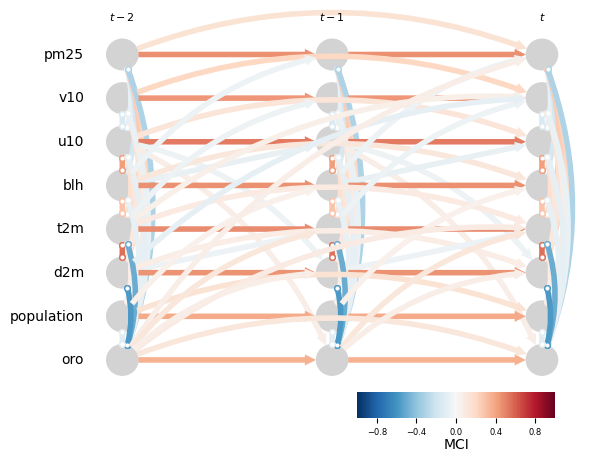

In [24]:
# Plot time series graph
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

## Graph with anomalies

In [25]:
station_idx = stations[1000]
df_station = pd.DataFrame({"pm25":df_pm25[station_idx], "v10": df_v10[station_idx], "u10": df_u10[station_idx], "blh": df_blh[station_idx], "t2m": df_t2m[station_idx], "d2m": df_d2m[station_idx], "population": df_pop[station_idx], "oro": df_oro[station_idx]}).dropna()
df_station.index = pd.to_datetime(df_station.index)

In [26]:
df_station_mean = df_station.groupby(df_station.index.dayofyear).mean()
df_station_std = df_station.groupby(df_station.index.dayofyear).std()

In [27]:
anom_df = None
for dd in df_station_mean.index:
    # print(dd)
    anom = (df_station.loc[df_station.index.dayofyear==dd] - df_station_mean.loc[dd])/ df_station_std.loc[dd]
    
    if anom_df is None:
        anom_df = anom
    else:
        anom_df = pd.concat([anom_df, anom])
    print(dd, len(anom_df))
anom_df = anom_df.sort_index()

1 6
2 12
3 18
4 24
5 30
6 36
7 42
8 48
9 54
10 60
11 66
12 72
13 78
14 84
15 90
16 96
17 102
18 108
19 114
20 120
21 126
22 132
23 138
24 144
25 150
26 156
27 162
28 168
29 174
30 180
31 186
32 192
33 198
34 204
35 210
36 216
37 222
38 228
39 234
40 240
41 246
42 252
43 258
44 264
45 270
46 276
47 282
48 288
49 294
50 300
51 306
52 312
53 318
54 324
55 330
56 336
57 342
58 348
59 354
60 360
61 366
62 372
63 378
64 384
65 390
66 396
67 402
68 408
69 414
70 420
71 426
72 432
73 438
74 444
75 450
76 456
77 462
78 468
79 474
80 480
81 486
82 492
83 498
84 504
85 510
86 516
87 522
88 528
89 534
90 540
91 546
92 552
93 558
94 564
95 570
96 576
97 582
98 588
99 594
100 600
101 606
102 612
103 618
104 624
105 630
106 636
107 642
108 648
109 654
110 660
111 666
112 672
113 678
114 684
115 690
116 696
117 702
118 708
119 714
120 720
121 726
122 732
123 738
124 744
125 750
126 756
127 762
128 768
129 774
130 780
131 786
132 792
133 798
134 804
135 810
136 816
137 822
138 828
139 834
140 839
141 8

In [28]:
anom_df
    

,pm25,v10,u10,blh,t2m,d2m,population,oro
2020-01-01,0.457405,0.130834,0.456002,-0.283688,-0.698178,-0.572714,NaN,NaN
2020-01-02,0.264115,1.219044,0.252365,0.715341,-0.043051,0.046000,NaN,NaN
2020-01-03,0.139428,-0.175009,0.111012,-0.026574,-0.338618,-0.214758,NaN,NaN
2020-01-04,-0.334171,-0.502717,-0.038178,-0.350383,-0.109965,-0.059915,NaN,NaN
2020-01-05,-0.353968,-0.860093,-0.763733,-0.607971,-0.023892,0.020188,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-05-15,-0.360365,-1.031300,0.676366,-0.726903,0.759571,-0.316325,NaN,NaN
2025-05-16,-0.367348,-0.285298,0.750881,-0.468726,0.333427,0.611780,NaN,NaN
2025-05-17,-0.102006,0.332690,0.615435,-0.698693,0.614215,0.643626,NaN,NaN
2025-05-18,-0.319544,0.631338,0.523197,-0.168668,0.456979,0.219950,NaN,NaN


(<Figure size 640x480 with 6 Axes>,
 array([<Axes: ylabel='pm25'>, <Axes: ylabel='v10'>, <Axes: ylabel='u10'>,
        <Axes: ylabel='blh'>, <Axes: ylabel='t2m'>, <Axes: ylabel='d2m'>],
       dtype=object))

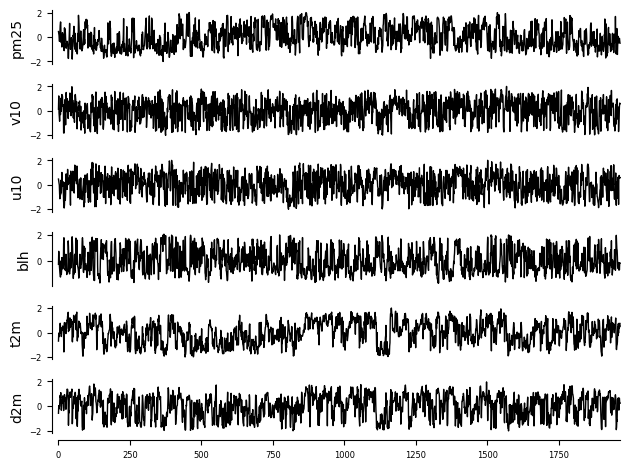

In [29]:
dataframe = pp.DataFrame(anom_df.values[:,:-2], var_names=anom_df.columns[:-2])
var_names = anom_df.columns[:-2]
tp.plot_timeseries(dataframe)



In [30]:
parcorr = ParCorr()
pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
all_parents = pcmci_parcorr.run_pc_stable(tau_max=1, pc_alpha=0.2)
results = pcmci_parcorr.run_pcmci(tau_max=2, pc_alpha=0.2, alpha_level = 0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 1
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable pm25 has 4 link(s):
        (pm25 -1): max_pval = 0.00000, |min_val| =  0.562
        (blh -1): max_pval = 0.00000, |min_val| =  0.114
        (u10 -1): max_pval = 0.00252, |min_val| =  0.068
        (d2m -1): max_pval = 0.01356, |min_val| =  0.056

    Variable v10 has 2 link(s):
        (v10 -1): max_pval = 0.00000, |min_val| =  0.379
        (u10 -1): max_pval = 0.15127, |min_val| =  0.032

    Variable u10 has 4 link(s):
        (u10 -1): max_pval = 0.00000, |min_val| =  0.369
        (v10 -1): max_pval = 0.07797, |min_val| =  0.040
        (d2m -1): max_pval = 0.17295, |min_val| =  0.031
        (pm25 -1): max_pval = 0.17436, |min_val| =  0.031

    Variable blh has 4 link(s):
        (blh -1): max_pval = 0.00000, |min_val| =  0.460
      

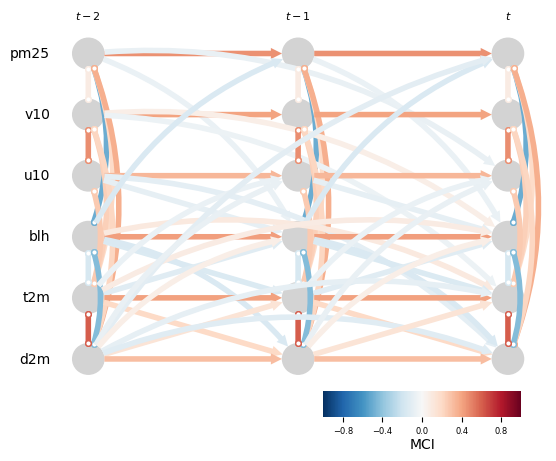

In [31]:
# Plot time series graph
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

# General causal graph

So far we have obtained the causal graph for a single station. Now we aim to get the causal drive of all stations. We will try to do this in two ways:
    1) Causal discovery of the aggregated timeseries for the whole europe
    2) Agreggation of causal discovery graphs obtained taken into account each station case.

## 1) Causal graph of aggregates


In [5]:
df_pm25.mean(axis=1)

2020-01-01    1.292470e-08
2020-01-02    1.389394e-08
2020-01-03    1.226314e-08
2020-01-04    9.240915e-09
2020-01-05    8.414479e-09
                  ...     
2025-05-28    6.030287e-09
2025-05-29    5.993524e-09
2025-05-30    6.056138e-09
2025-05-31    7.316293e-09
2025-06-01    7.047492e-09
Length: 1979, dtype: float64

In [6]:
def get_RH(temp, dew_point_temp):
    T  = temp - 273.15
    Td = dew_point_temp -273.15
    rh = 100*(np.exp((17.625*Td)/(243.04+Td)) / np.exp((17.625*T)/(243.04+T)))
    return rh

In [7]:
df_rh = get_RH(df_t2m, df_d2m)

In [8]:

# df_europe = pd.DataFrame({"pm25":df_pm25.mean(axis=1), "v10": df_v10.mean(axis=1), "u10": df_u10.mean(axis=1), "blh": df_blh.mean(axis=1), "t2m": df_t2m.mean(axis=1), "d2m": df_d2m.mean(axis=1), "population": df_pop.mean(axis=1), "oro": df_oro.mean(axis=1)}).dropna()
df_europe = pd.DataFrame({"pm25":df_pm25.mean(axis=1), "v10": df_v10.mean(axis=1), "u10": df_u10.mean(axis=1), "blh": df_blh.mean(axis=1), "RH":df_rh.mean(axis=1), "population": df_pop.mean(axis=1), "oro": df_oro.mean(axis=1)}).dropna()
#df_station.index = pd.to_datetime(df_station.index)
df_europe.index = pd.to_datetime(df_europe.index)
df_europe.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2025-05-10', '2025-05-11', '2025-05-12', '2025-05-13',
               '2025-05-14', '2025-05-15', '2025-05-16', '2025-05-17',
               '2025-05-18', '2025-05-19'],
              dtype='datetime64[ns]', length=1966, freq=None)

(<Figure size 640x480 with 5 Axes>,
 array([<Axes: ylabel='pm25'>, <Axes: ylabel='v10'>, <Axes: ylabel='u10'>,
        <Axes: ylabel='blh'>, <Axes: ylabel='RH'>], dtype=object))

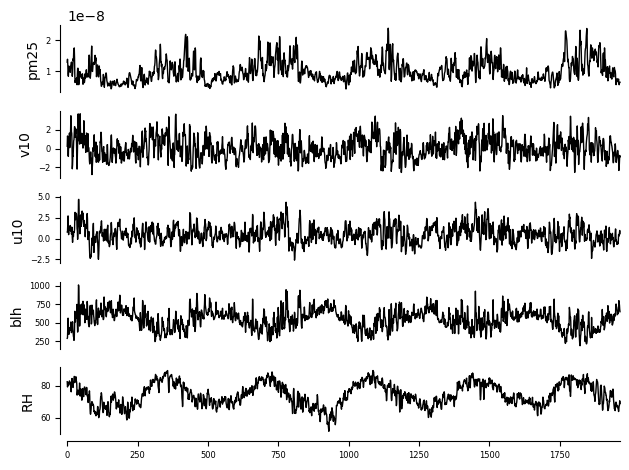

In [9]:
dataframe = pp.DataFrame(df_europe.values[:,:-2], var_names=df_europe.columns[:-2])
var_names = df_europe.columns[:-2]
tp.plot_timeseries(dataframe)

In [10]:
df_europe_mean = df_europe.groupby(df_europe.index.dayofyear).mean()
df_europe_std = df_europe.groupby(df_europe.index.dayofyear).std()

In [11]:
anom_df = None
for dd in df_europe_mean.index:
    # print(dd)
    anom = (df_europe.loc[df_europe.index.dayofyear==dd] - df_europe_mean.loc[dd])/ df_europe_std.loc[dd]
    
    if anom_df is None:
        anom_df = anom
    else:
        anom_df = pd.concat([anom_df, anom])
    print(dd, len(anom_df))
anom_df = anom_df.sort_index()

1 6
2 12
3 18
4 24
5 30
6 36
7 42
8 48
9 54
10 60
11 66
12 72
13 78
14 84
15 90
16 96
17 102
18 108
19 114
20 120
21 126
22 132
23 138
24 144
25 150
26 156
27 162
28 168
29 174
30 180
31 186
32 192
33 198
34 204
35 210
36 216
37 222
38 228
39 234
40 240
41 246
42 252
43 258
44 264
45 270
46 276
47 282
48 288
49 294
50 300
51 306
52 312
53 318
54 324
55 330
56 336
57 342
58 348
59 354
60 360
61 366
62 372
63 378
64 384
65 390
66 396
67 402
68 408
69 414
70 420
71 426
72 432
73 438
74 444
75 450
76 456
77 462
78 468
79 474
80 480
81 486
82 492
83 498
84 504
85 510
86 516
87 522
88 528
89 534
90 540
91 546
92 552
93 558
94 564
95 570
96 576
97 582
98 588
99 594
100 600
101 606
102 612
103 618
104 624
105 630
106 636
107 642
108 648
109 654
110 660
111 666
112 672
113 678
114 684
115 690
116 696
117 702
118 708
119 714
120 720
121 726
122 732
123 738
124 744
125 750
126 756
127 762
128 768
129 774
130 780
131 786
132 792
133 798
134 804
135 810
136 816
137 822
138 828
139 834
140 839
141 8

In [12]:
anom_df

,pm25,v10,u10,blh,RH,population,oro
2020-01-01,-0.394692,-1.014935,-0.911080,-1.197572,0.129818,NaN,NaN
2020-01-02,0.347426,0.033627,-0.419945,-1.078179,-1.409795,NaN,NaN
2020-01-03,0.389099,0.319965,0.144930,-0.544512,-1.403037,NaN,NaN
2020-01-04,-0.789076,-1.137343,0.944873,0.937750,-0.977441,NaN,NaN
2020-01-05,-0.990579,-0.799392,-0.035934,-0.258526,-1.639262,NaN,NaN
...,...,...,...,...,...,...,...
2025-05-15,-0.872211,-1.373846,0.308521,1.638276,-0.658370,NaN,NaN
2025-05-16,-0.822026,-1.121890,0.100223,1.418007,-0.399367,NaN,NaN
2025-05-17,-0.584604,-0.634012,0.263917,0.777574,-0.362911,NaN,NaN
2025-05-18,-0.671178,-0.314958,0.525635,0.890978,0.372075,NaN,NaN


(<Figure size 640x480 with 5 Axes>,
 array([<Axes: ylabel='pm25'>, <Axes: ylabel='v10'>, <Axes: ylabel='u10'>,
        <Axes: ylabel='blh'>, <Axes: ylabel='RH'>], dtype=object))

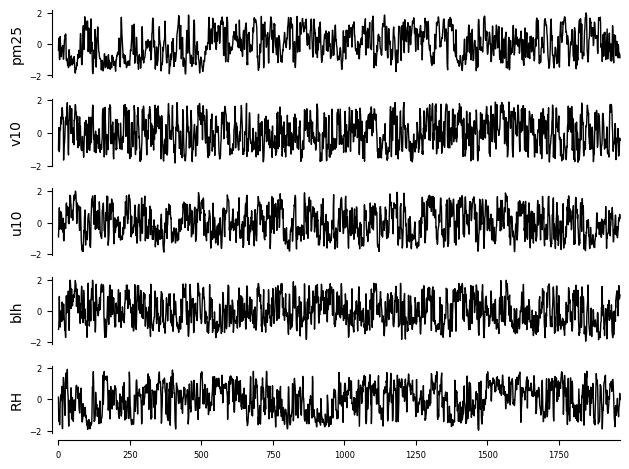

In [13]:
dataframe = pp.DataFrame(anom_df.values[:,:-2], var_names=anom_df.columns[:-2])
var_names = anom_df.columns[:-2]
tp.plot_timeseries(dataframe)

In [14]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


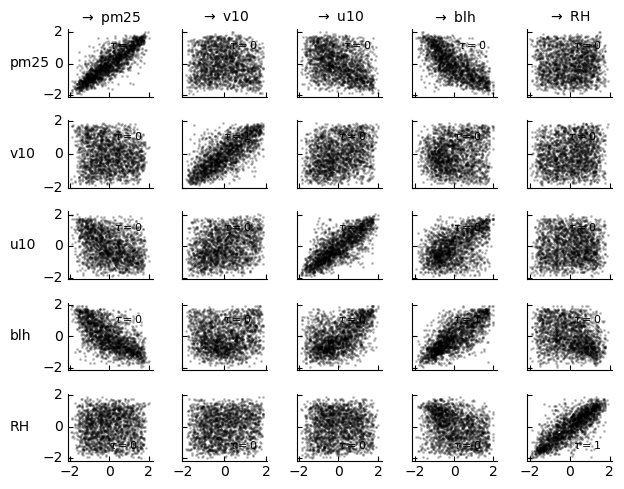

In [15]:
matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()

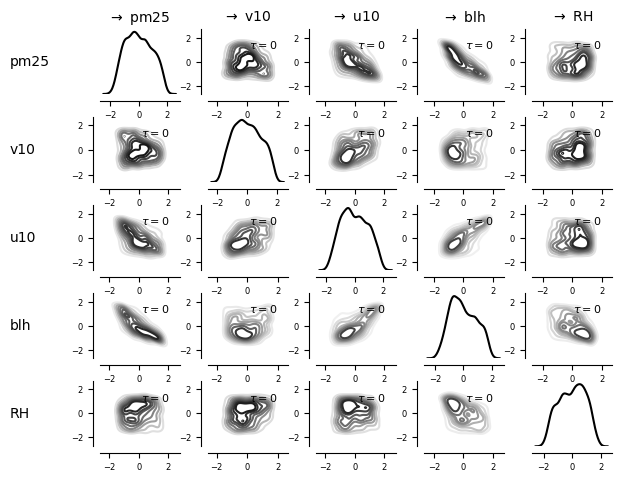

In [16]:
tp.plot_densityplots(dataframe=dataframe, add_densityplot_args={'matrix_lags':matrix_lags})
plt.show()


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 10


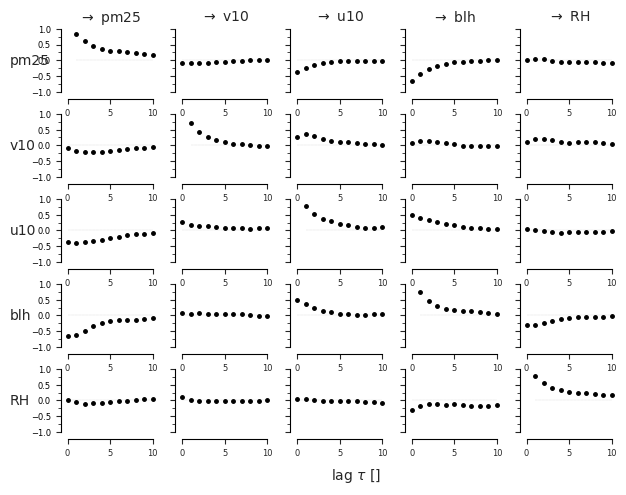

In [17]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

correlations = pcmci.get_lagged_dependencies(tau_max=10, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()

In [18]:
parcorr = ParCorr()
pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
#all_parents = pcmci_parcorr.run_pc_stable(tau_max=1, pc_alpha=0.2)
results = pcmci_parcorr.run_pcmci(tau_max=3, pc_alpha=0.2, alpha_level = 0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable pm25 has 9 link(s):
        (pm25 -1): max_pval = 0.00000, |min_val| =  0.643
        (pm25 -2): max_pval = 0.00000, |min_val| =  0.190
        (blh -1): max_pval = 0.00000, |min_val| =  0.135
        (v10 -1): max_pval = 0.00000, |min_val| =  0.122
        (pm25 -3): max_pval = 0.00003, |min_val| =  0.094
        (u10 -3): max_pval = 0.00175, |min_val| =  0.071
        (RH -1): max_pval = 0.00571, |min_val| =  0.062
        (RH -2): max_pval = 0.02935, |min_val| =  0.049
        (blh -2): max_pval = 0.04410, |min_val| =  0.046

    Variable v10 has 4 link(s):
        (v10 -1): max_pval = 0.00000, |min_val| =  0.666
        (v10 -2): max_pval = 0.00000, |min_val| =  0.204
        (v10 -3): max_pval = 0.01683, |min_val| =  0.054
        (u10 -2)

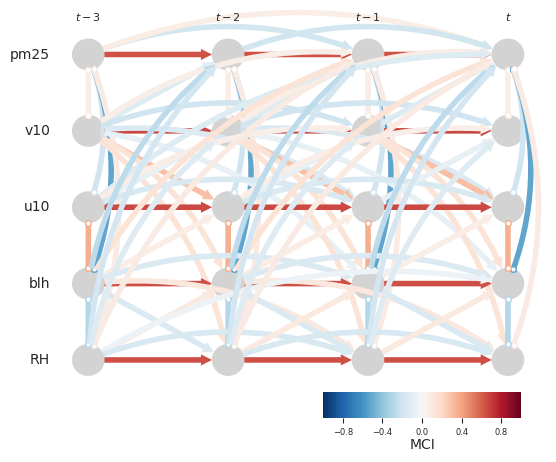

In [19]:
# Plot time series graph
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

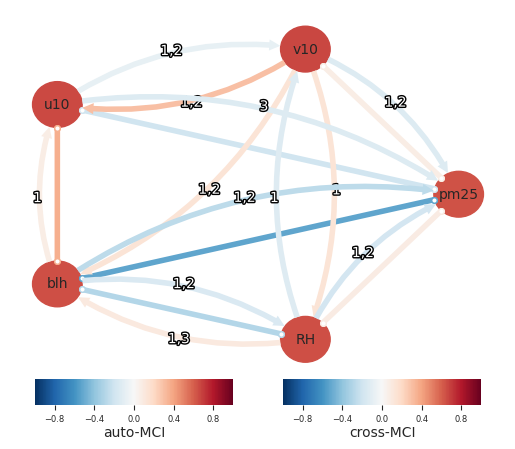

In [140]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False,
    arrow_linewidth=4.0
    ); plt.show()

## Removing contemporaneous links from graph

In [21]:
results["filtered_links"]= np.where(results["graph"]=="o-o","", results["graph"])

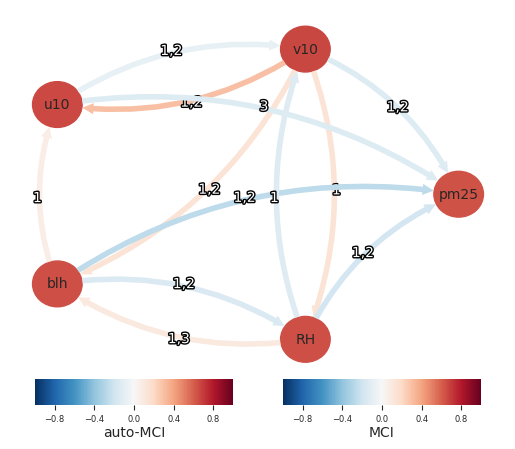

In [22]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['filtered_links'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False,
    arrow_linewidth=4.0
    ); plt.show()

In [156]:
results["graph"][1,:,2]

array(['-->', '-->', '-->', '-->', ''], dtype='<U3')

In [157]:
results["val_matrix"][1,:,2]

array([ 0.0682581 , -0.20193006, -0.15400492, -0.08522004,  0.00091603])

## Average causal graph
Instead of computing the average fields of input variable for the whole europe and obtain the causal graph from there, we are going to compute the causal_graph for each station and then merge all causal graphs into a single one

In [24]:
results["val_matrix"]


array([[[ 0.00000000e+00,  6.39691266e-01, -1.90647670e-01,
          7.74819888e-02],
        [ 7.47523526e-02,  2.72796692e-02, -5.08048104e-02,
         -3.63638150e-03],
        [-2.01083217e-01, -3.16862504e-02,  1.67475761e-02,
          1.69901782e-02],
        [-5.25633654e-01, -3.74842924e-02,  8.80122091e-03,
         -2.32492046e-02],
        [ 8.01147812e-02, -1.25524426e-03, -3.39998583e-02,
         -1.57114509e-02]],

       [[ 7.47523526e-02, -1.37135453e-01,  6.82581022e-02,
         -1.60398222e-03],
        [ 0.00000000e+00,  6.65213992e-01, -2.01930062e-01,
          3.61780858e-02],
        [ 3.51095393e-02,  2.99431697e-01, -1.54004923e-01,
          3.48556684e-02],
        [-3.10637593e-02,  1.39838190e-01, -8.52200370e-02,
          2.22303405e-02],
        [ 4.95733664e-02,  1.38703211e-01,  9.16032388e-04,
         -1.03139209e-02]],

       [[-2.01083217e-01,  1.24671637e-02, -2.12305230e-02,
         -1.37070347e-01],
        [ 3.51095393e-02, -8.38520552e-

In [30]:
station_idx = stations[0]
df_station = pd.DataFrame({"pm25":df_pm25[station_idx], "v10": df_v10[station_idx], "u10": df_u10[station_idx], "blh": df_blh[station_idx], "t2m": df_t2m[station_idx], "d2m": df_d2m[station_idx], "population": df_pop[station_idx], "oro": df_oro[station_idx]}).dropna()


In [40]:
results_stations = np.zeros([10, 5, 5, 4])
results_graphs = []
for istation, station in enumerate(stations[:10]):
    print(istation)
    station_idx = stations[istation]
    df_station = pd.DataFrame({"pm25":df_pm25[station_idx], "v10": df_v10[station_idx], "u10": df_u10[station_idx], "blh": df_blh[station_idx], "t2m": df_t2m[station_idx], "d2m": df_d2m[station_idx], "population": df_pop[station_idx], "oro": df_oro[station_idx]}).dropna()
    df_station.index = pd.to_datetime(df_station.index)
    
    df_station_mean = df_station.groupby(df_station.index.dayofyear).mean()
    df_station_std = df_station.groupby(df_station.index.dayofyear).std()

    anom_df = None
    for dd in df_station_mean.index:
        # print(dd)
        anom = (df_station.loc[df_station.index.dayofyear==dd] - df_station_mean.loc[dd])/ df_station_std.loc[dd]
        
        if anom_df is None:
            anom_df = anom
        else:
            anom_df = pd.concat([anom_df, anom])
        print(dd, len(anom_df))
    anom_df = anom_df.sort_index()

    parcorr = ParCorr()
    pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
    #all_parents = pcmci_parcorr.run_pc_stable(tau_max=1, pc_alpha=0.2)
    results = pcmci_parcorr.run_pcmci(tau_max=3, pc_alpha=0.2, alpha_level = 0.01)

    results_graphs = np.append(results_graphs,results["graph"])
    results_stations[istation,:,:,:] = results["val_matrix"]

0
1 6
2 12
3 18
4 24
5 30
6 36
7 42
8 48
9 54
10 60
11 66
12 72
13 78
14 84
15 90
16 96
17 102
18 108
19 114
20 120
21 126
22 132
23 138
24 144
25 150
26 156
27 162
28 168
29 174
30 180
31 186
32 192
33 198
34 204
35 210
36 216
37 222
38 228
39 234
40 240
41 246
42 252
43 258
44 264
45 270
46 276
47 282
48 288
49 294
50 300
51 306
52 312
53 318
54 324
55 330
56 336
57 342
58 348
59 354
60 360
61 366
62 372
63 378
64 384
65 390
66 396
67 402
68 408
69 414
70 420
71 426
72 432
73 438
74 444
75 450
76 456
77 462
78 468
79 474
80 480
81 486
82 492
83 498
84 504
85 510
86 516
87 522
88 528
89 534
90 540
91 546
92 552
93 558
94 564
95 570
96 576
97 582
98 588
99 594
100 600
101 606
102 612
103 618
104 624
105 630
106 636
107 642
108 648
109 654
110 660
111 666
112 672
113 678
114 684
115 690
116 696
117 702
118 708
119 714
120 720
121 726
122 732
123 738
124 744
125 750
126 756
127 762
128 768
129 774
130 780
131 786
132 792
133 798
134 804
135 810
136 816
137 822
138 828
139 834
140 839
141

In [36]:
results_dict["SPO-AD0942A-6001"]["graph"].shape

(5, 5, 4)

In [38]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])